# Data analysis of prominent mountains around the world.

## 1. Loading the modules and data

**Loading the modules**

In [1]:
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

**Loading the data**

In [2]:
data=pd.read_csv('Input/Mountains.csv')
data.shape

(118, 11)

In [3]:
data=data.drop(['Height (ft)'], axis=1)
data=data.rename(columns={'Height (m)':'Height', 'Prominence (m)':'Prominence'})
data.head()

,Rank,Mountain,Height,Prominence,Range,Coordinates,Parent mountain,First ascent,Ascents bef. 2004,Failed attempts bef. 2004
0,1,Mount Everest / Sagarmatha / Chomolungma,8848,8848,Mahalangur Himalaya,27°59′17″N 86°55′31″E﻿,NaN,1953,>>145,121.0
1,2,K2 / Qogir / Godwin Austen,8611,4017,Baltoro Karakoram,35°52′53″N 76°30′48″E﻿,Mount Everest,1954,45,44.0
2,3,Kangchenjunga,8586,3922,Kangchenjunga Himalaya,27°42′12″N 88°08′51″E﻿,Mount Everest,1955,38,24.0
3,4,Lhotse,8516,610,Mahalangur Himalaya,27°57′42″N 86°55′59″E﻿,Mount Everest,1956,26,26.0
4,5,Makalu,8485,2386,Mahalangur Himalaya,27°53′23″N 87°05′20″E﻿,Mount Everest,1955,45,52.0


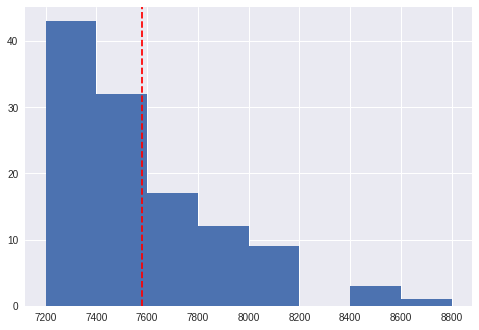

In [4]:
plt.hist(data['Height'], bins=range(7200, 9000, 200), histtype='bar')
plt.axvline(data['Height'].mean(),linestyle='dashed',color='red')

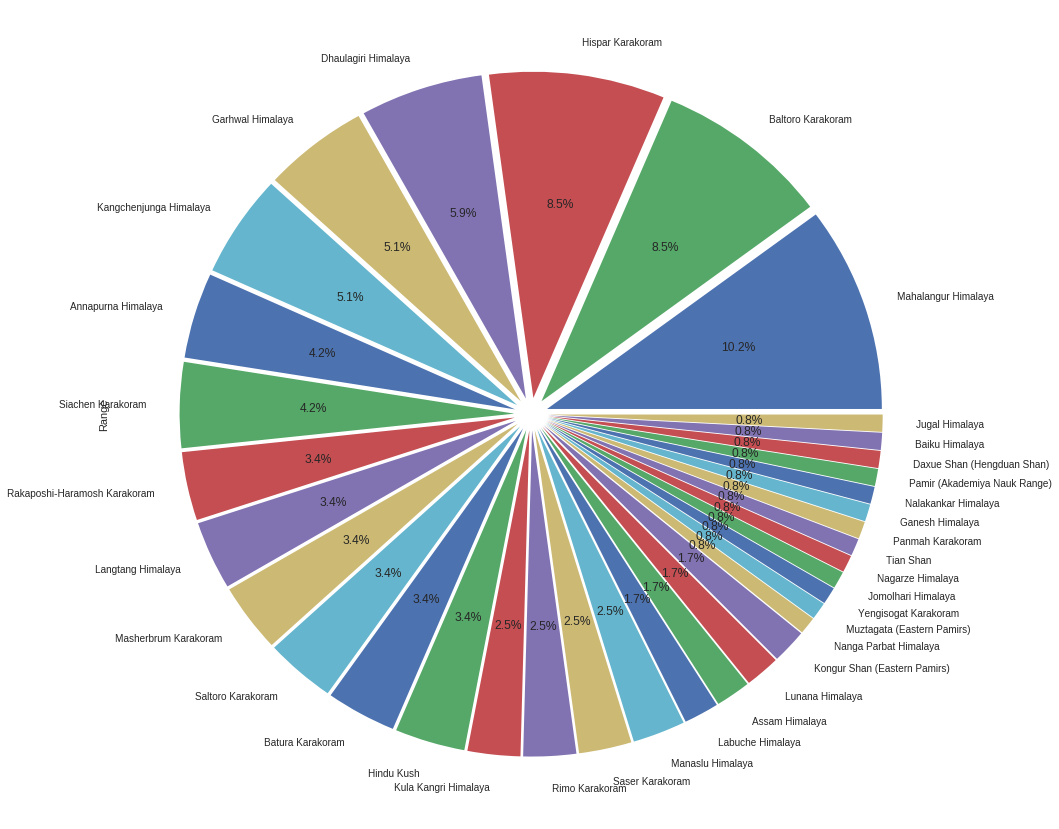

In [5]:
explode=[]
for i in range(len(data['Range'].unique())):
    explode.append(0.05)
data['Range'].value_counts().plot(kind='pie', explode=explode, autopct='%1.1f%%')
fig=plt.gcf()
fig.set_size_inches(15, 15)
plt.show()

In [6]:
data.sort_values('Height', ascending=False).drop_duplicates(subset=['Range'], keep='first')[['Mountain', 'Range', 'Height']]

,Mountain,Range,Height
0,Mount Everest / Sagarmatha / Chomolungma,Mahalangur Himalaya,8848
1,K2 / Qogir / Godwin Austen,Baltoro Karakoram,8611
2,Kangchenjunga,Kangchenjunga Himalaya,8586
6,Dhaulagiri I,Dhaulagiri Himalaya,8167
7,Manaslu,Manaslu Himalaya,8163
8,Nanga Parbat,Nanga Parbat Himalaya,8126
9,Annapurna I,Annapurna Himalaya,8091
13,Shishapangma,Jugal Himalaya,8027
19,Distaghil Sar,Hispar Karakoram,7884
23,Masherbrum / K1,Masherbrum Karakoram,7821


The above table shows top peaks among various ranges with height of that mountain. Most prominent ranges are *Himalaya* and *Karakoram*.

In [7]:
def get_parent_range(row):
    if 'Himalaya' in row['Range']:
        return 'Himalaya'
    elif 'Karakoram' in row['Range']:
        return 'Karakoram'
    else:
        return np.NaN

data['Parent Range']=data.apply(get_parent_range, axis=1)

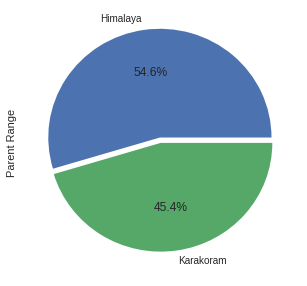

In [8]:
data['Parent Range'].value_counts().plot(kind='pie', explode=[0.05, 0], autopct='%1.1f%%')
fig=plt.gcf()
fig.set_size_inches(5, 5)
plt.show()

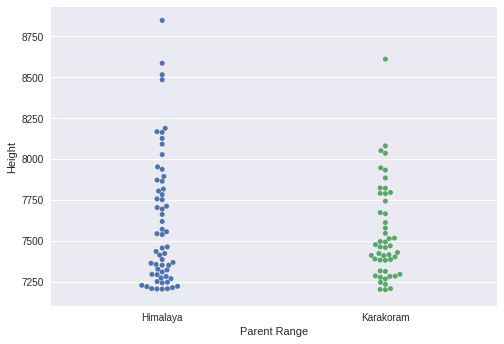

In [9]:
sns.swarmplot(x='Parent Range', y='Height', data=data)

So we can see majority of the peaks are present in *Himalaya*. The highest peaks are present in the *Himalaya*.

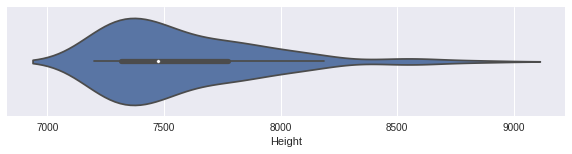

In [10]:
plt.figure(figsize=(10,2))
sns.violinplot(x='Height', data=data)

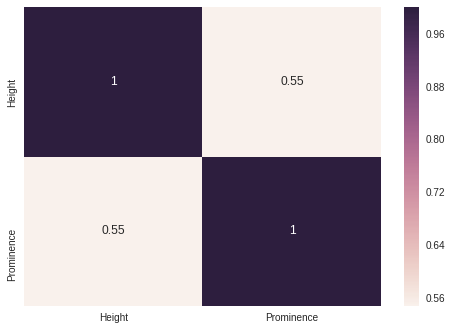

In [11]:
df=data.drop(['Rank', 'Parent Range', 'First ascent', 'Ascents bef. 2004', 'Failed attempts bef. 2004'], axis=1)
sns.heatmap(df.corr(), annot=True)

In [12]:
data[data['First ascent']=='unclimbed']

,Rank,Mountain,Height,Prominence,Range,Coordinates,Parent mountain,First ascent,Ascents bef. 2004,Failed attempts bef. 2004,Parent Range
44,40,Gangkhar Puensum,7570,2995,Kula Kangri Himalaya,28°02′50″N 90°27′19″E﻿,Kangchenjunga,unclimbed,0,3.0,Himalaya
102,94,Labuche Kang III / East,7250,570,Labuche Himalaya,28°18′05″N 86°23′02″E﻿,Labuche Kang,unclimbed,0,0.0,Himalaya
108,100,Karjiang,7221,880,Kula Kangri Himalaya,28°15′27″N 90°38′49″E﻿,Kula Kangri,unclimbed,0,2.0,Himalaya
111,103,Tongshanjiabu,7207,1757,Lunana Himalaya,28°11′12″N 89°57′27″E﻿,Gangkar Puensum,unclimbed,0,0.0,Himalaya


The table above details of the unclimbed mountains.

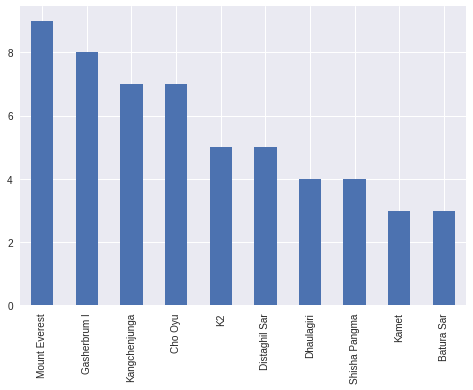

In [13]:
data['Parent mountain'].value_counts().head(10).plot(kind='bar')

So *Mount Everest* is one of the most prominent mountains in the *Himalayas*.

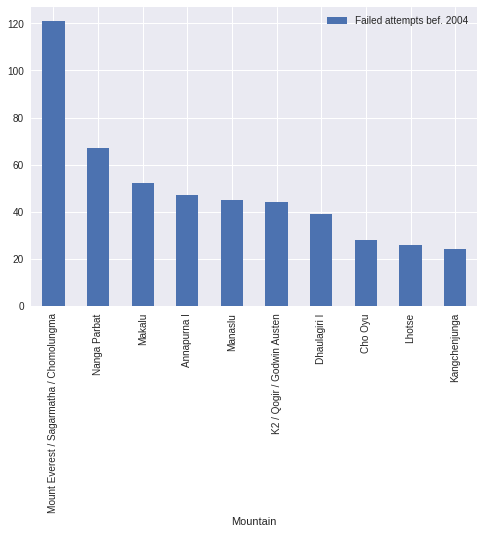

In [14]:
data.sort_values('Failed attempts bef. 2004', ascending=False).head(10)[['Mountain', 'Height', 'Failed attempts bef. 2004', 'Ascents bef. 2004']].plot(x='Mountain', y=['Failed attempts bef. 2004', 'Ascents bef. 2004'], kind='bar')

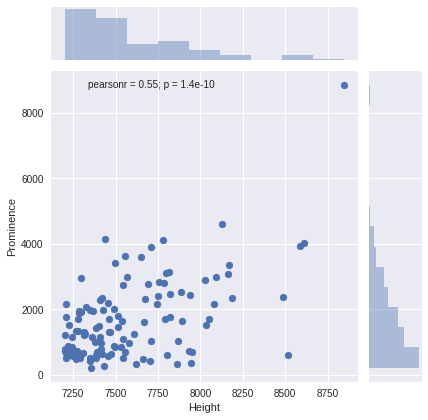

In [15]:
sns.jointplot(x='Height', y='Prominence', data=data)